<a href="https://colab.research.google.com/github/ShinyQ/Tugas-Besar-Statistika_Credit-Card-Exploration_Data-Mining/blob/main/Tubes_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Statistika**

**Anggota Kelompok :**
1. Hanvito Michael Lee      - 1301190090
2. Kurniadi Ahmad Wijaya    - 1301194024
3. Moh Naufal Mizan Saputro - 1301190015
4. Naufal Haritsah Luthfi   - 1301194073

>
>

**Library Yang Digunakan :**

1. Pandas, Sebagai Alat Bantu Statistik Dalam Pengolahan Data
2. Numpy, Sebagai Manipulator Array Pada Data
3. Seaborn, Sebagai Visualisasi Data Yang Telah Di Modelkan 
4. Matplotlib, Sebagai Library Tambahan Dalam Visualisasi Data 
4. Scikit, Sebagai Pengetesan Akurasi Data Yang Telah Di Modelkan

>
>

**Deskripsi Data :**

Data yang digunakan bersumber pada [https://www.kaggle.com/sakshigoyal7/credit-card-customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers) dimana tujuan data adalah untuk memprediksikan bagaimana sesorang kemungkinan akan meninggalkan penggunaan kartu kredit (churn) pada perusahaan.



## **Define Research Question**

Pada bagian ini kami mengelompokkan pertanyaan-pertanyaan yang akan kami jawab untuk diberikan ke manajer kartu kredit.

1. Apakah Terdapat Korelasi Antara Umur Dengan Jumlah Transaksi Yang Dilakukan Pengguna ?

2. Bagaimana Limit Kredit Yang Dimiliki Masing-Masing Jenis Kategori Kartu ?

3. Bagaimanakah Tingkat Edukasi Mempengaruhi Jenis Kartu Serta Pelanggan Yang Berhenti Berlangganan Kredit ?

4. Bagaimanakah tingkat transaksi yang dikeluarkan pengguna berdasarkan kategori kartu ?

5. Bagaimanakah Kategori Pemasukan Pengguna Mempengaruhi Jenis Kartu ?

6. Bagaimanakah Korelasi Antara Jumlah Transaksi Dan Jumlah Kredit Yang Dikeluarkan ?

7. Apakah Umur Mempengaruhi Jumlah Transaksi Kredit ?

8. Bagaimanakah Jenis Kartu Kredit Mempengaruhi Jumlah Transaksi Pengguna ?

9. Bagaimanakah Korelasi Umur Dengan Jumlah Pengeluaran Kredit ?

10. Bagaimanakah Pengaruh Total Pengeluaran Terhadap Total Transaksi Pengguna ?

## **Collect And Organize Data**

In [1]:
# Mengimport Library Yang Dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from scipy import stats

In [2]:
# Memanggil File BankChurners.csv yang akan di processing 

def get_pdf():
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    url = "https://cdn.discordapp.com/attachments/781504776495038524/789899865962053632/BankChurners.csv"
    headers={'User-Agent':user_agent,} 
    
    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    return response

# Membaca File CSV yang telah diimport
data_csv = get_pdf()
data = pd.read_csv(data_csv)

In [3]:
# Menampilkan Sampel data teratas
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [4]:
# Mengecek Ukuran Data 
data.shape

(10127, 23)

## **Wrangle Data**

In [5]:
# Menghapus Kolom Yang Tidak Digunakan
data.drop([
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
          ], 
          axis=1, inplace=True)

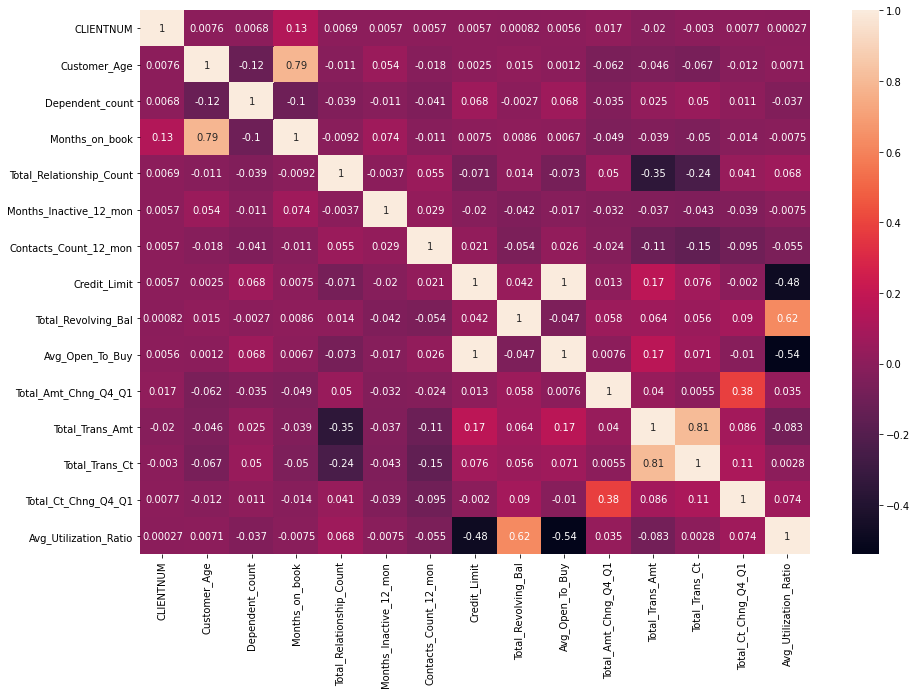

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='rocket')

In [7]:
# Menghapus Kolom Yang Tidak Digunakan
data.drop([
           'Gender', 'Dependent_count', 'Marital_Status', 'Months_on_book', 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'CLIENTNUM',
           'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
          ], 
          axis=1, inplace=True)

In [8]:
# Mengecek Apakah Terdapat Data Kosong Pada Data
data.isnull().sum()

Attrition_Flag     0
Customer_Age       0
Education_Level    0
Income_Category    0
Card_Category      0
Credit_Limit       0
Total_Trans_Amt    0
Total_Trans_Ct     0
dtype: int64

**Kesimpulan:** Tidak Terdapat Data Kosong Pada Keseluruhan Value di Kolom

In [9]:
# Mengecek Jenis Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Customer_Age     10127 non-null  int64  
 2   Education_Level  10127 non-null  object 
 3   Income_Category  10127 non-null  object 
 4   Card_Category    10127 non-null  object 
 5   Credit_Limit     10127 non-null  float64
 6   Total_Trans_Amt  10127 non-null  int64  
 7   Total_Trans_Ct   10127 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 633.1+ KB


In [10]:
# Mengecek Deskripsi Statistik Data
data.describe()

,Customer_Age,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,4404.086304,64.858695
std,8.016814,9088.776650,3397.129254,23.472570
min,26.000000,1438.300000,510.000000,10.000000
25%,41.000000,2555.000000,2155.500000,45.000000
50%,46.000000,4549.000000,3899.000000,67.000000
75%,52.000000,11067.500000,4741.000000,81.000000
max,73.000000,34516.000000,18484.000000,139.000000


In [11]:
# Mengurangi Outlier Transaction Amount Untuk Card Category
Category = data
Category = Category.drop(['Attrition_Flag', 'Education_Level','Income_Category', 'Customer_Age','Credit_Limit','Total_Trans_Ct'], axis=1)

for x in range(5):
  Q1 = Category['Total_Trans_Amt'].quantile(0.25)
  Q3 = Category['Total_Trans_Amt'].quantile(0.75)
  IQR = Q3 - Q1

  BB = Q1 - (1.5 * IQR)
  BA = Q3 + (1.5 * IQR)

  Category = Category[~((Category['Total_Trans_Amt'] < BB) | (Category['Total_Trans_Amt'] > BA))]

In [12]:
# Mengurangi Outlier Credity Limit Untuk Card Category
Category_Limit = data
Category_Limit = Category_Limit.drop(['Attrition_Flag', 'Education_Level','Income_Category', 'Customer_Age','Total_Trans_Amt','Total_Trans_Ct'], axis=1)

for x in range(17):
  Q1 = Category_Limit['Credit_Limit'].quantile(0.25)
  Q3 = Category_Limit['Credit_Limit'].quantile(0.75)
  IQR = Q3 - Q1

  BB = Q1 - (1.5 * IQR)
  BA = Q3 + (1.5 * IQR)

  Category_Limit = Category_Limit[~((Category_Limit['Credit_Limit'] < BB) | (Category_Limit['Credit_Limit'] > BA) & (Category_Limit['Card_Category'] != 'Platinum'))]


In [13]:
# Modelling Total Amount By Card Category
Total_Amount = []
Card_Amount = data['Card_Category'].unique()

for n in Card_Amount:
    Sum_Category = data.loc[(data['Card_Category']==n)]
    Sum_Category = Sum_Category['Total_Trans_Amt'].sum()
    Total_Amount.append(Sum_Category)

In [14]:
# Modelling Data Visualization

sns.set_theme(style="whitegrid")

def boxplot_transaction_amount_category():
    plt.figure(figsize=(8, 8))
    plt.title('Boxplot Kategori Kartu Dengan Jumlah Pengeluaran Kredit Transaksi', fontsize="14", pad=20)

    ax = sns.boxplot(data=Category, x='Total_Trans_Amt', y='Card_Category')
    ax.set(xlabel='Total Transaction Amount', ylabel='Card Category')
    plt.show()

def lineplot_transaction_count_age():
    plt.figure(figsize=(15, 5))
    plt.title('Lineplot Hubungan Total Transaksi Dengan Umur', fontsize="14", pad=20)

    ax = sns.lineplot(data=data, x="Customer_Age", y="Total_Trans_Ct", marker="o", palette="deep", ci=None)
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Count')
    sns.set_context("notebook", rc={"lines.linewidth": 2.5})
    sns.set_style("whitegrid")

    plt.xticks(np.arange(25, max(data['Customer_Age'])+1, 5.0))
    plt.show()

def scatterplot_transaction_count_amount():
    plt.figure(figsize=(8, 8))
    plt.title('Scatterplot Total Transaksi Dengan Total Pengeluaran Kredit', fontsize="14", pad=20)

    ax = sns.scatterplot(data=data, x="Total_Trans_Amt", y = "Total_Trans_Ct")
    ax.set(xlabel='Total Transaction Amount', ylabel='Total Transaction Count')
    plt.show()

def histogram_transaction_amount_age():
    plt.figure(figsize=(10, 8))
    plt.title('Histogram Umur dengan Total Transaksi Kredit', fontsize="14", pad=20)

    ax = sns.histplot(data=data, x="Customer_Age",y='Total_Trans_Amt', bins=10,cbar=True)
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Amount')

    plt.xticks(np.arange(min(data['Customer_Age'])-1, max(data['Customer_Age'])+1, 5.0))
    plt.yticks(np.arange(2500, max(data['Total_Trans_Amt'])+1, 1000.0))
    plt.show()

def scatterplot_transaction_amount_age():
    plt.figure(figsize=(8, 8))
    plt.title('Scatterplot Umur Dengan Total Transaksi Kredit', fontsize="14", pad=20)

    ax = sns.scatterplot(data=data, x="Customer_Age", y = "Total_Trans_Amt")
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Amount')
    plt.show()

def boxplot_card_credit_limit():
    plt.figure(figsize=(14, 5))
    plt.title('Boxplot Kategori Kartu Dengan Credit Limit', fontsize="14", pad=20)

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(data=Category_Limit, x='Credit_Limit', y='Card_Category')
    ax.set(xlabel='Credit Limit', ylabel='Card Category')

    plt.xticks(np.arange(0, 35000, 2000.0))
    plt.show()

def barplot_education_attrition():
    plt.figure(figsize=(12,5))
    plt.title('Barplot Pengguna Kredit Berdasarkan Edukasi Dan Jenis Attrition', pad=20, fontsize=14)

    values_education =data['Education_Level'].value_counts().values
    ax = sns.countplot(x='Education_Level',hue='Attrition_Flag', data=data, order = data['Education_Level'].value_counts().index)
    ax.set(xlabel='Education Level', ylabel='Jumlah')
    plt.show()

## **Explore, Visualize And Analyze Data**

**Boxplot Kategori Kartu Dengan Jumlah Pengeluaran Kredit Transaksi**

Menjelaskan mengenai penggunaan suatu jenis kartu kredit tertentu dengan jumlah total transaksi pengguna.Dari keempat boxplot berdasarkan Card Category tersebut, dapat dilihat bahwa rata-rata pemakaian yang paling besar yaitu terdapat pada kartu berjenis platinum yang mana kartu jenis platinum merupakan kartu yang paling tinggi tingkatannya diantara jenis kartu yang lain. Jenis kartu blue dan silver kita lihat memiliki outliers setelah nilai maksimumnya, yang berarti bahwa terdapat total transaksi pengguna pada kartu berjenis blue dan silver yang bernilai terlalu jauh dari total transaksi pengguna lainnya. 

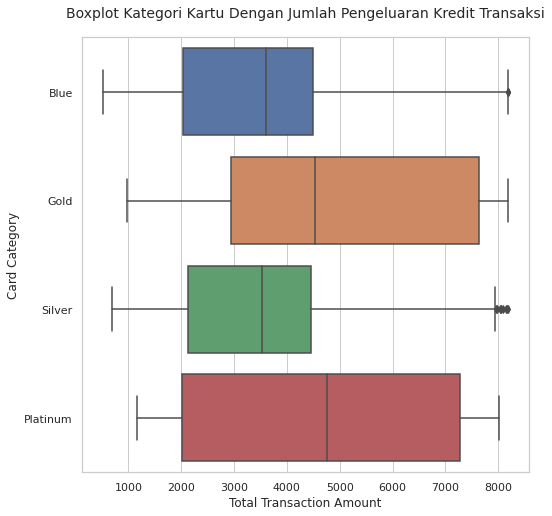

In [15]:
boxplot_transaction_amount_category()

**Boxplot Kategori Kartu Dengan Jumlah Pengeluaran Kredit Transaksi**

Dapat kita lihat pada diagram garis tersebut, sumbu x merupakan umur pengguna dan sumbu y merupakan total transaction count pengguna. Dari diagram garis tersebut, disimpulkan bahwa semakin naiknya umur seorang pengguna, maka daya minat beli mereka akan semakin turun.

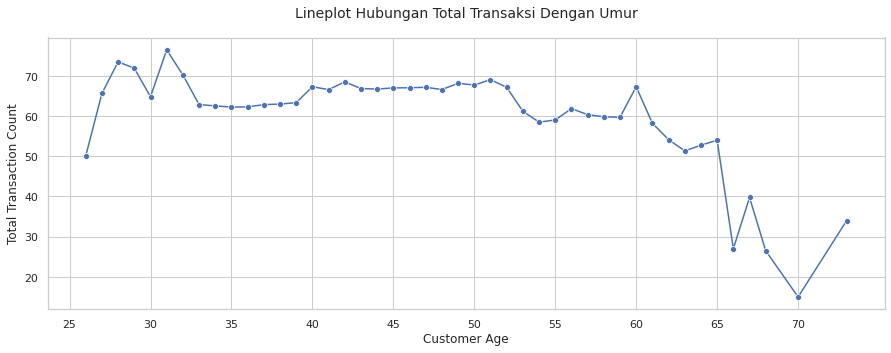

In [16]:
lineplot_transaction_count_age()

**Scatterplot Total Transaksi Dengan Total Pengeluaran Kredit**

Dari scatterplot dibawah, dapat disimpulkan bahwa total transaction count dengan total transaction amount berhubungan cukup kuat dibuktikan dengan bentuk penyebaran data nya membentuk garis diagonal dari kiri bawah ke kanan atas dengan hubungan linier positif. Jika kita mencari korelasi antara 2 variabel tersebut,akan didapatkan nilai 0.80 yang berarti 2 variabel tersebut memang berhubungan cukup kuat.

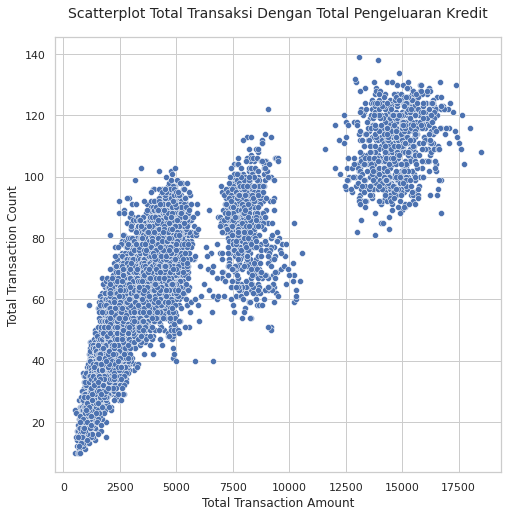

In [17]:
scatterplot_transaction_count_amount()

**Histogram Umur dengan Total Transaksi Kredit**

Deskripsi Chart

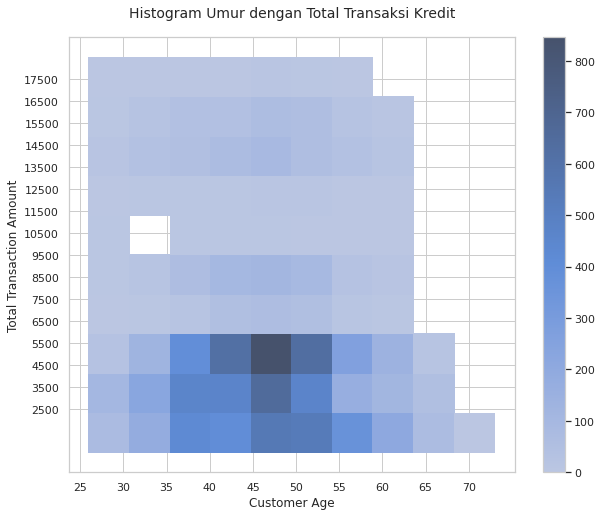

In [18]:
histogram_transaction_amount_age()

**Scatterplot Umur Dengan Total Transaksi Kredit**

Deskripsi Chart

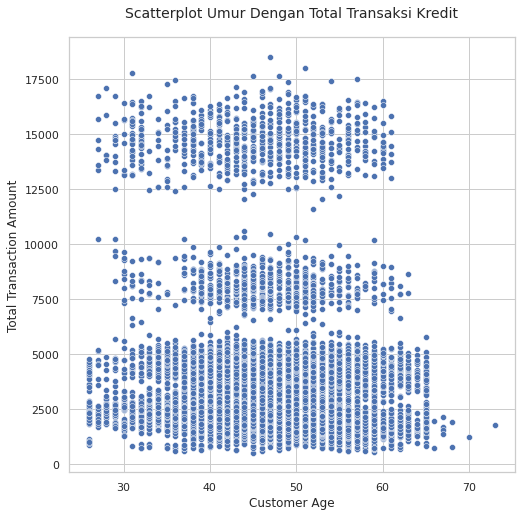

In [19]:
scatterplot_transaction_amount_age()

**Boxplot Kategori Kartu Dengan Credit Limit**

Deskripsi Chart

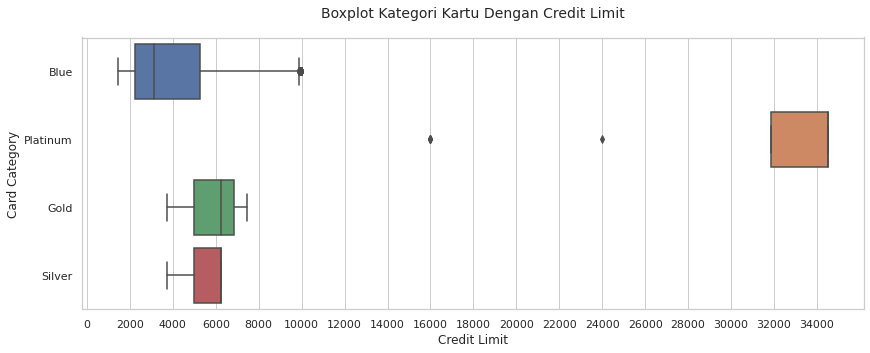

In [20]:
boxplot_card_credit_limit()

**Barplot Pengguna Kredit Berdasarkan Edukasi Dan Jenis Attrition**

Deskripsi Chart

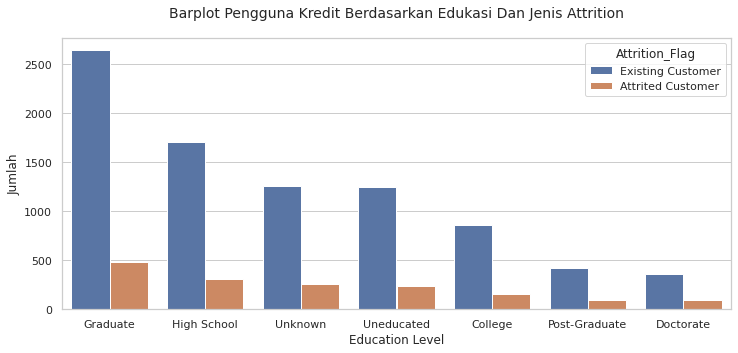

In [21]:
barplot_education_attrition()